<a href="https://colab.research.google.com/github/JamshedAli18/E-commerce-Sales-Forecast/blob/main/E_commerce_Sales_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/International sale Report.csv')

In [10]:
df.head()

,index,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT
0,0,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1.00,616.56,617.00
1,1,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1.00,616.56,617.00
2,2,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1.00,616.56,617.00
3,3,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1.00,616.56,617.00
4,4,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1.00,616.56,617.00


In [4]:
df.columns

Index(['index', 'DATE', 'Months', 'CUSTOMER', 'Style', 'SKU', 'Size', 'PCS',
       'RATE', 'GROSS AMT'],
      dtype='object')

In [8]:
df['CUSTOMER'].dtype

dtype('O')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37432 entries, 0 to 37431
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      37432 non-null  int64 
 1   DATE       37431 non-null  object
 2   Months     37407 non-null  object
 3   CUSTOMER   36392 non-null  object
 4   Style      36392 non-null  object
 5   SKU        34958 non-null  object
 6   Size       36392 non-null  object
 7   PCS        36392 non-null  object
 8   RATE       36392 non-null  object
 9   GROSS AMT  36392 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.9+ MB


In [12]:
df.isnull().sum()

,0
index,0
DATE,1
Months,25
CUSTOMER,1040
Style,1040
SKU,2474
Size,1040
PCS,1040
RATE,1040
GROSS AMT,1040


In [13]:
df = df.drop(columns=['index', 'Months', 'CUSTOMER', 'Style', 'SKU', 'Size'])

In [18]:
df.head(163)

,DATE,PCS,RATE,GROSS AMT
0,06-05-21,1.00,616.56,617.00
1,06-05-21,1.00,616.56,617.00
2,06-05-21,1.00,616.56,617.00
3,06-05-21,1.00,616.56,617.00
4,06-05-21,1.00,616.56,617.00
...,...,...,...,...
158,06-15-21,1.00,1494.35,1494.00
159,06-15-21,1.00,1364.35,1364.00
160,06-15-21,1.00,1039.35,1039.00
161,06-15-21,1.00,714.35,714.00


In [16]:
df.dropna(subset=['DATE', 'PCS', 'RATE', 'GROSS AMT'], inplace=True)

In [19]:
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')


<ipython-input-19-a2184006f3f0>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')


In [20]:
df.head()

,DATE,PCS,RATE,GROSS AMT
0,2021-06-05,1.00,616.56,617.00
1,2021-06-05,1.00,616.56,617.00
2,2021-06-05,1.00,616.56,617.00
3,2021-06-05,1.00,616.56,617.00
4,2021-06-05,1.00,616.56,617.00


In [21]:
# Drop rows with invalid dates
df.dropna(subset=['DATE'], inplace=True)

# Extract month and year
df['Month'] = df['DATE'].dt.month
df['Year'] = df['DATE'].dt.year

In [22]:
df.head()

,DATE,PCS,RATE,GROSS AMT,Month,Year
0,2021-06-05,1.00,616.56,617.00,6,2021
1,2021-06-05,1.00,616.56,617.00,6,2021
2,2021-06-05,1.00,616.56,617.00,6,2021
3,2021-06-05,1.00,616.56,617.00,6,2021
4,2021-06-05,1.00,616.56,617.00,6,2021


In [23]:
df['PCS'] = pd.to_numeric(df['PCS'], errors='coerce')
df['RATE'] = pd.to_numeric(df['RATE'], errors='coerce')
df['GROSS AMT'] = pd.to_numeric(df['GROSS AMT'], errors='coerce')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18635 entries, 0 to 18634
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       18635 non-null  datetime64[ns]
 1   PCS        18635 non-null  float64       
 2   RATE       18635 non-null  float64       
 3   GROSS AMT  18635 non-null  float64       
 4   Month      18635 non-null  int32         
 5   Year       18635 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2)
memory usage: 873.5 KB


In [25]:
df.isnull().sum()

,0
DATE,0
PCS,0
RATE,0
GROSS AMT,0
Month,0
Year,0


In [26]:
X = df[['Month', 'Year', 'PCS', 'RATE']]
y = df['GROSS AMT']

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [31]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()

In [34]:
model.fit(X_train,y_train)

LinearRegression()

In [35]:
X_test.head()

,Month,Year,PCS,RATE
1798,7,2021,1.0,450.00
18241,4,2022,5.0,500.00
18036,4,2022,1.0,812.50
3531,9,2021,2.0,681.25
12802,12,2021,1.0,738.00


In [36]:
y_test.head()

,GROSS AMT
1798,450.0
18241,2500.0
18036,812.5
3531,1294.0
12802,738.0


In [37]:
model.predict([[7,	2021,	1.0,	450.00]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([443.43631519])

In [39]:
y_pred = model.predict(X_test)

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [42]:
Mae = mean_absolute_error(y_test,y_pred)
Mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [43]:
Mae

93.3887170389073

In [44]:
Mse

53182.18980855294

In [45]:
r2

0.8583255890487795

In [47]:
model.score(X_test,y_test)

0.8583255890487795

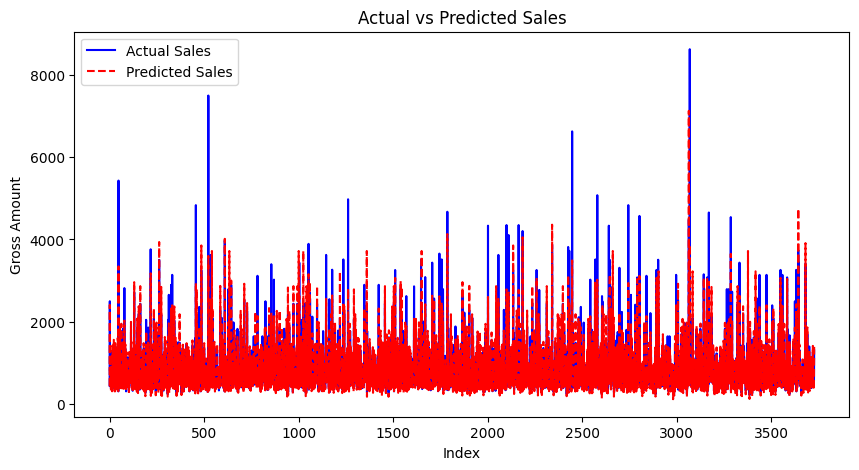

In [48]:
# Plotting the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Sales')
plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='--', label='Predicted Sales')
plt.xlabel('Index')
plt.ylabel('Gross Amount')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()